In [ ]:
# A mockup of our linar regression machine learning model: comparing and predicting happiness and GDP
# references 
# https://towardsdatascience.com/machine-learning-with-python-regression-complete-tutorial-47268e546cea
# https://www.youtube.com/watch?v=E5RjzSK0fvY
# https://www.youtube.com/watch?v=VmbA0pi2cRQ&t=10s

In [ ]:
# future changes:
# 1. insert correct files names
# 2. insert colors
#3. insert labels

In [3]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

In [11]:
# read the data into a df

data= pd.read_csv("joined_final_tables.csv")

# idk what these are, might need it later though 
#dtf = dtf[["Id"]+cols+["SalePrice"]]

print(data.shape)
data.head()

(142, 5)


,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Suicide rate
0,Afghanistan,60.6,68.2,3.794,20.6
1,Albania,74.8,81.3,4.959,32.4
2,Algeria,73.3,78.9,5.605,15.6
3,Andorra,81.7,84.8,6.955,18.9
4,Angola,58.1,65.6,4.105,20.5


In [14]:
# collect x and y
X = data['Happiness Score'].values
Y = data['Life Expectancy (years) - Women'].values

In [20]:
# mean for graphing

mean_x = np.mean(X)
mean_y = np.mean(Y)

# totals

m = len(X)

# using this guy's formula to calculate b1 and b0
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom  += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

#hopefully that works, print dat
print(b1, b0)

5.135444778038931 48.428493032780594


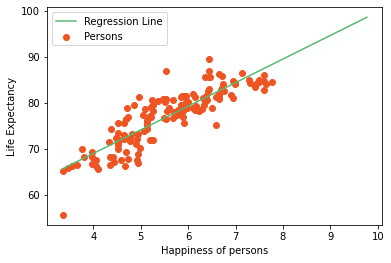

In [32]:
#plot values and regression line?
max_x = np.max(X) + 2
min_x = np.min(X) - 0

#calculate line values x and y
x = np.linspace(min_x, max_x, 1000) #why 1000?
y = b0 + b1 * x

# plot line, the best part
plt.plot(x, y, color= '#58b970', label = 'Regression Line')

#plot scatterplot
plt.scatter(X, Y, c='#ef5423', label = 'Persons')

#extras
plt.xlabel('Happiness of persons')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

In [33]:
#test it, we can change it later but i'm going r2
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * x[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

-2.1719998300716745


In [36]:
#sklearn stuff, double check
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#no rank 1 (????)
X = X.reshape((m, 1))
#create the model
reg = LinearRegression()
#fitting training data
reg = reg.fit(X, Y)
# Y prediction
Y_pred = reg.predict(X)

#calculate r2
r2_score = reg.score(X, Y)
print(r2_score)

0.7545223657898436
